In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
aisles = pd.read_csv("/content/drive/MyDrive/aisles.csv")
departments = pd.read_csv("/content/drive/MyDrive/departments.csv")
orders = pd.read_csv("/content/drive/MyDrive/orders.csv")
products = pd.read_csv("/content/drive/MyDrive/products.csv")
products_prior = pd.read_csv("/content/drive/MyDrive/order_products__prior.csv")

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [22]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [27]:
aisles.duplicated().sum()

0

In [23]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [5]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [29]:
departments.duplicated().sum()

0

In [25]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


As the orders table is too large to apply describe so we will dask which is a parallel computing library it enables distributed computing and can handle larger than memory datasets.

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [9]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [15]:
orders['days_since_prior_order'].fillna(value=0, inplace=True)

In [16]:
orders['days_since_prior_order'] = orders['days_since_prior_order'].astype(int)

In [30]:
orders.duplicated().sum()

0

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   eval_set                object
 3   order_number            int64 
 4   order_dow               int64 
 5   order_hour_of_day       int64 
 6   days_since_prior_order  int64 
dtypes: int64(6), object(1)
memory usage: 182.7+ MB


In [10]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [31]:
products.duplicated().sum()

0

In [19]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [20]:
products_prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [32]:
products_prior.duplicated().sum()

0

In [21]:
products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


Now as data is clean so let's start the pre processing step.

#Feature Engineering

In [33]:
bins = [0,4,8,12,16,20,24]
labels = ['LN','EM','M','A','E','N']
orders['hour_group'] = pd.cut(orders['order_hour_of_day'],bins = bins,labels=labels)

In [34]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,hour_group
0,2539329,1,prior,1,2,8,0,EM
1,2398795,1,prior,2,3,7,15,EM
2,473747,1,prior,3,3,12,21,M
3,2254736,1,prior,4,4,7,29,EM
4,431534,1,prior,5,4,15,28,A


In [35]:
category = 'LN'
late_night_orders = orders[orders['hour_group'] == category]

In [37]:
late_night_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,hour_group
215,2483716,19,prior,8,4,4,7,LN
536,1354506,37,prior,3,0,1,8,LN
604,2019391,42,prior,10,5,1,9,LN
815,1630627,54,prior,33,1,1,2,LN
889,463436,57,prior,8,4,1,9,LN


In [43]:
order_and_product = pd.merge(late_night_orders,products_prior,on = 'order_id')

In [44]:
order_and_product.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,hour_group,product_id,add_to_cart_order,reordered
0,2483716,19,prior,8,4,4,7,LN,17008,1,1
1,2483716,19,prior,8,4,4,7,LN,31487,2,1
2,2483716,19,prior,8,4,4,7,LN,30960,3,0
3,2483716,19,prior,8,4,4,7,LN,14197,4,0
4,2483716,19,prior,8,4,4,7,LN,9493,5,0


In [42]:
late_night_orders.count()

order_id                  30938
user_id                   30938
eval_set                  30938
order_number              30938
order_dow                 30938
order_hour_of_day         30938
days_since_prior_order    30938
hour_group                30938
dtype: int64

In [45]:
order_and_product.count()

order_id                  289824
user_id                   289824
eval_set                  289824
order_number              289824
order_dow                 289824
order_hour_of_day         289824
days_since_prior_order    289824
hour_group                289824
product_id                289824
add_to_cart_order         289824
reordered                 289824
dtype: int64

In [46]:
order_and_product.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
hour_group                0
product_id                0
add_to_cart_order         0
reordered                 0
dtype: int64

In [48]:
order_and_product.duplicated().sum()

0

In [102]:
top_LN_orders = order_and_product['product_id'].value_counts().head(10)

In [103]:
top_LN_orders = pd.DataFrame(top_LN_orders)

In [104]:
# prompt: here what is happing that product id is considered as index and count is considered as product id how do i rectify that

top_LN_orders.reset_index(inplace=True)


In [105]:
top_LN_orders

,index,product_id
0,24852,3493
1,13176,3369
2,21903,2216
3,21137,2047
4,47209,1721
5,47766,1397
6,47626,1244
7,16797,1150
8,26209,1118
9,27966,1026


In [106]:
top_LN_orders.rename(columns = {'index':'product_id','product_id':'count'},inplace = True)

In [107]:
top_LN_orders

,product_id,count
0,24852,3493
1,13176,3369
2,21903,2216
3,21137,2047
4,47209,1721
5,47766,1397
6,47626,1244
7,16797,1150
8,26209,1118
9,27966,1026


In [110]:
LN_ordered_products = pd.merge(top_LN_orders,products,on='product_id')

In [111]:
LN_ordered_products

,product_id,count,product_name,aisle_id,department_id
0,24852,3493,Banana,24,4
1,13176,3369,Bag of Organic Bananas,24,4
2,21903,2216,Organic Baby Spinach,123,4
3,21137,2047,Organic Strawberries,24,4
4,47209,1721,Organic Hass Avocado,24,4
5,47766,1397,Organic Avocado,24,4
6,47626,1244,Large Lemon,24,4
7,16797,1150,Strawberries,24,4
8,26209,1118,Limes,24,4
9,27966,1026,Organic Raspberries,123,4


<Axes: xlabel='product_name'>

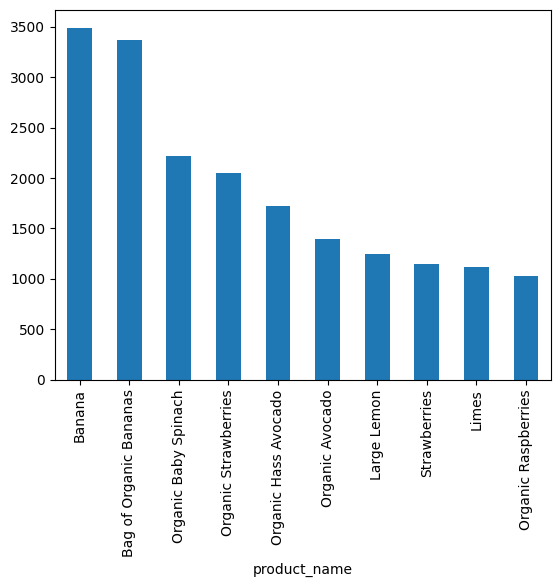

In [113]:
LN_ordered_products.plot(kind='bar',x = 'product_name',y= 'count',legend = False)

In [114]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [115]:
first_orders = orders[orders['days_since_prior_order'] == 0]

In [116]:
first_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,hour_group
0,2539329,1,prior,1,2,8,0,EM
8,2295261,1,prior,9,1,16,0,A
11,2168274,2,prior,1,2,11,0,M
26,1374495,3,prior,1,1,14,0,A
39,3343014,4,prior,1,6,11,0,M


In [117]:
first_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273964 entries, 0 to 3421069
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   order_id                273964 non-null  int64   
 1   user_id                 273964 non-null  int64   
 2   eval_set                273964 non-null  object  
 3   order_number            273964 non-null  int64   
 4   order_dow               273964 non-null  int64   
 5   order_hour_of_day       273964 non-null  int64   
 6   days_since_prior_order  273964 non-null  int64   
 7   hour_group              272312 non-null  category
dtypes: category(1), int64(6), object(1)
memory usage: 17.0+ MB


In [118]:
ord_prod = pd.merge(first_orders,products_prior,on = 'order_id')

In [119]:
ord_prod.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,hour_group,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0,EM,196,1,0
1,2539329,1,prior,1,2,8,0,EM,14084,2,0
2,2539329,1,prior,1,2,8,0,EM,12427,3,0
3,2539329,1,prior,1,2,8,0,EM,26088,4,0
4,2539329,1,prior,1,2,8,0,EM,26405,5,0


In [125]:
top_first_orders = ord_prod['product_id'].value_counts().head(10)

In [126]:
top_first_orders

24852    35174
13176    23847
21137    19483
21903    17792
47766    17093
47209    13441
26209    10719
16797    10553
47626    10205
27845     8704
Name: product_id, dtype: int64

In [127]:
top_first_orders = pd.DataFrame(top_first_orders)

In [128]:
top_first_orders.reset_index(inplace = True)

In [134]:
top_first_orders = top_first_orders.rename(columns = {'index':'product_id','product_id':'count'})

In [137]:
top_first_orders.head()

,product_id,count
0,24852,35174
1,13176,23847
2,21137,19483
3,21903,17792
4,47766,17093


In [138]:
Top_first_ordered_items = pd.merge(top_first_orders,products,on = 'product_id')

In [139]:
Top_first_ordered_items.head()

,product_id,count,product_name,aisle_id,department_id
0,24852,35174,Banana,24,4
1,13176,23847,Bag of Organic Bananas,24,4
2,21137,19483,Organic Strawberries,24,4
3,21903,17792,Organic Baby Spinach,123,4
4,47766,17093,Organic Avocado,24,4


<Axes: xlabel='product_name'>

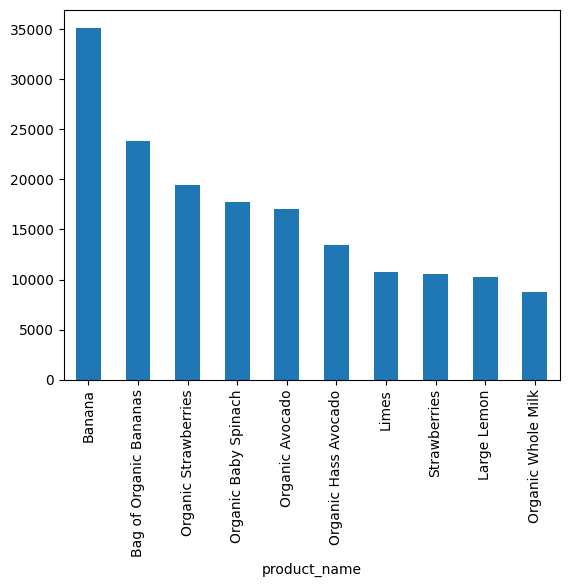

In [140]:
Top_first_ordered_items.plot(kind = 'bar',x='product_name',y ='count',legend = False)

In [142]:
category = 'EM'
early_morning_orders = orders[orders['hour_group'] == category]

In [143]:
early_morning_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,hour_group
0,2539329,1,prior,1,2,8,0,EM
1,2398795,1,prior,2,3,7,15,EM
3,2254736,1,prior,4,4,7,29,EM
5,3367565,1,prior,6,2,7,19,EM
9,2550362,1,prior,10,4,8,30,EM


In [144]:
EM_ord_prod = pd.merge(early_morning_orders,products_prior,on = 'order_id')

In [145]:
EM_ord_prod.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,hour_group,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,0,EM,196,1,0
1,2539329,1,prior,1,2,8,0,EM,14084,2,0
2,2539329,1,prior,1,2,8,0,EM,12427,3,0
3,2539329,1,prior,1,2,8,0,EM,26088,4,0
4,2539329,1,prior,1,2,8,0,EM,26405,5,0


In [158]:
Top_EM_orders = EM_ord_prod['product_id'].value_counts().head(10)

In [159]:
Top_EM_orders = pd.DataFrame(Top_EM_orders)

In [160]:
Top_EM_orders.reset_index(inplace = True)

In [161]:
Top_EM_orders = Top_EM_orders.rename(columns = {'index': 'product_id','product_id':'count'})

In [162]:
Top_EM_orders

,product_id,count
0,24852,48040
1,13176,38486
2,21137,27903
3,21903,23139
4,47209,20622
5,47766,15766
6,27845,15521
7,27966,14996
8,16797,14915
9,47626,13460


In [163]:
Top_EM_ordered_products = pd.merge(Top_EM_orders,products,on = 'product_id')

<Axes: xlabel='product_name'>

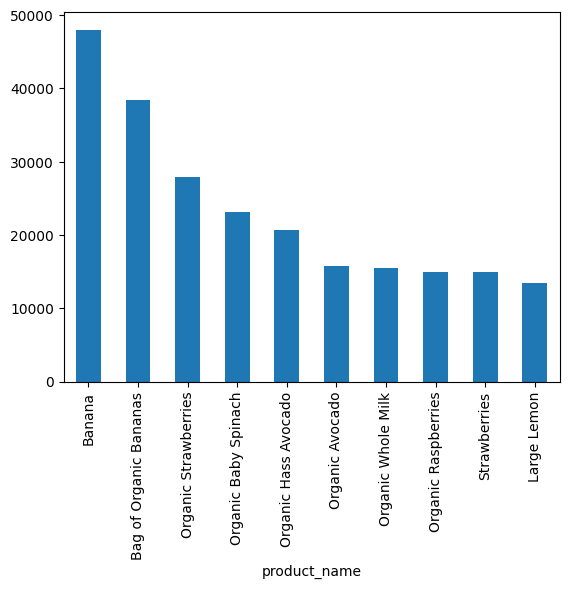

In [165]:
Top_EM_ordered_products.plot(kind='bar',x='product_name',y='count',legend=False)

<Axes: xlabel='product_name'>

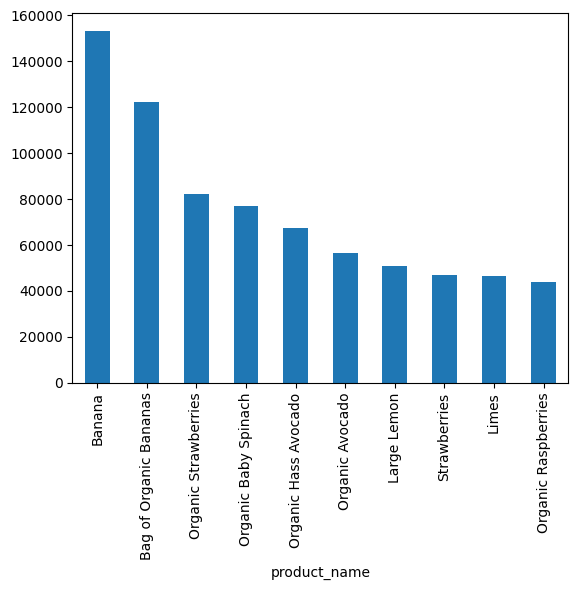

In [166]:
category = 'M'
morning_orders = orders[orders['hour_group'] == category]
M_ord_prod = pd.merge(morning_orders,products_prior,on = 'order_id')
Top_M_orders = M_ord_prod['product_id'].value_counts().head(10)
Top_M_orders = pd.DataFrame(Top_M_orders)
Top_M_orders.reset_index(inplace = True)
Top_M_orders = Top_M_orders.rename(columns = {'index': 'product_id','product_id':'count'})
Top_M_ordered_products = pd.merge(Top_M_orders,products,on = 'product_id')
Top_M_ordered_products.plot(kind='bar',x='product_name',y='count',legend=False)

<Axes: xlabel='product_name'>

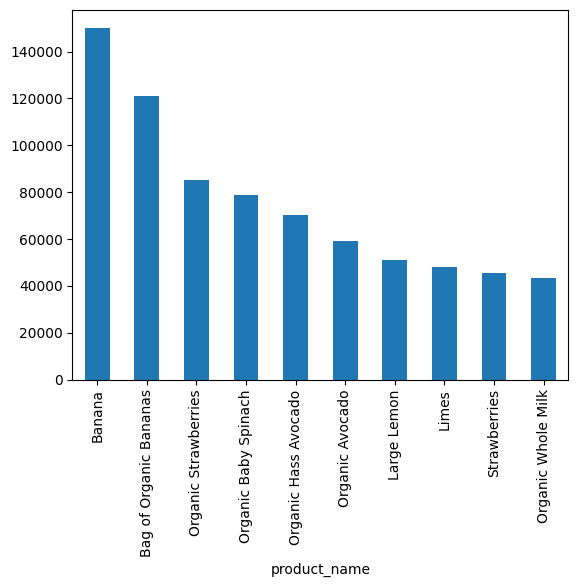

In [167]:
category = 'A'
afternoon_orders = orders[orders['hour_group'] == category]
A_ord_prod = pd.merge(afternoon_orders,products_prior,on = 'order_id')
Top_A_orders = A_ord_prod['product_id'].value_counts().head(10)
Top_A_orders = pd.DataFrame(Top_A_orders)
Top_A_orders.reset_index(inplace = True)
Top_A_orders = Top_A_orders.rename(columns = {'index': 'product_id','product_id':'count'})
Top_A_ordered_products = pd.merge(Top_A_orders,products,on = 'product_id')
Top_A_ordered_products.plot(kind='bar',x='product_name',y='count',legend=False)

<Axes: xlabel='product_name'>

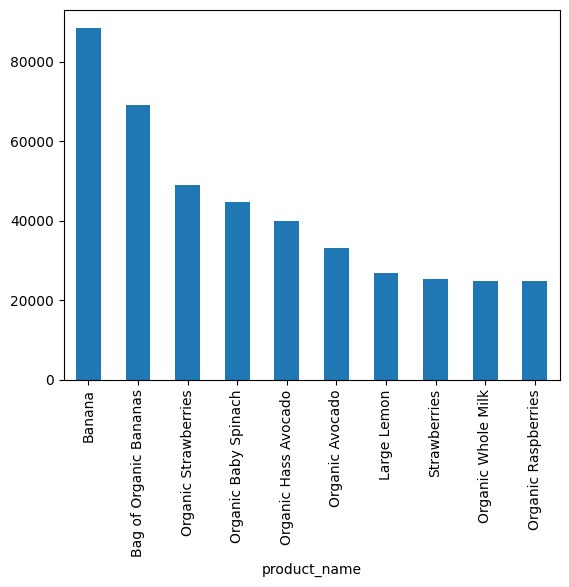

In [168]:
category = 'E'
evening_orders = orders[orders['hour_group'] == category]
E_ord_prod = pd.merge(evening_orders,products_prior,on = 'order_id')
Top_E_orders = E_ord_prod['product_id'].value_counts().head(10)
Top_E_orders = pd.DataFrame(Top_E_orders)
Top_E_orders.reset_index(inplace = True)
Top_E_orders = Top_E_orders.rename(columns = {'index': 'product_id','product_id':'count'})
Top_E_ordered_products = pd.merge(Top_E_orders,products,on = 'product_id')
Top_E_ordered_products.plot(kind='bar',x='product_name',y='count',legend=False)

<Axes: xlabel='product_name'>

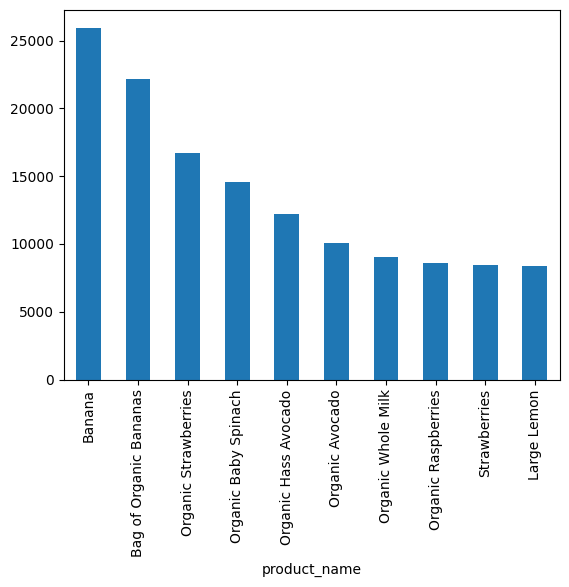

In [169]:
category = 'N'
night_orders = orders[orders['hour_group'] == category]
N_ord_prod = pd.merge(night_orders,products_prior,on = 'order_id')
Top_N_orders = N_ord_prod['product_id'].value_counts().head(10)
Top_N_orders = pd.DataFrame(Top_N_orders)
Top_N_orders.reset_index(inplace = True)
Top_N_orders = Top_N_orders.rename(columns = {'index': 'product_id','product_id':'count'})
Top_N_ordered_products = pd.merge(Top_N_orders,products,on = 'product_id')
Top_N_ordered_products.plot(kind='bar',x='product_name',y='count',legend=False)